<a href="https://colab.research.google.com/github/sarilacivert/unicorn/blob/main/FoxworthyJohn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **John Foxworthy Case Study, October 2022**

In [72]:
# Required imports
import numpy as np
import pandas as pd

# Data Visualization 
from matplotlib import pyplot as plt
import seaborn as sns

### **1.  Importing the Dataset**

In [73]:
data = pd.read_csv('/content/sample_data/Test_Model_Data.csv', engine='python')

df = pd.DataFrame(data)

list(df.columns.values)

['Company ID',
 'Valuation ($m)',
 '(Crunchbase) Monthly Visits to Company Home Page (m)',
 '(Tracxn) Number of New Articles since Last Year',
 '(Crunchbase) Number of Acquisitions',
 '(Crunchbase) Number of Patents Granted',
 '(Crunchbase) Competitor Max Total Funding Amount ($m)',
 '(App Annie) Average Change in Downloads (k)',
 '(Crunchbase) Growth in Page Views:Visit Ratio',
 '(Crunchbase) Competitor Average Funding Amount ($m)',
 '(Tracxn) Change in Twitter Followers over 6 Months (k)',
 '(Glassdoor) CEO Rating',
 '(Crunchbase) Website Monthly Rank Change (#)',
 '(Tracxn) Number of Twitter Followers (k)',
 '(Crunchbase) 90 Days Trend Score',
 '(Crunchbase) Number of Founders',
 '(Tracxn) Score',
 '(Twitter) Maximum Number of Followers of Competitor (k)',
 '(LinkedIn) 2 Years Headcount Growth (%)',
 '(Crunchbase) Total Products Active',
 '(Crunchbase) Minimum Number of Articles about Competitors']

In [74]:
df.shape

(1297, 21)

#### There are 21 columns and 1,297 rows.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Company ID                                                 1297 non-null   int64  
 1   Valuation ($m)                                             1297 non-null   object 
 2   (Crunchbase) Monthly Visits to Company Home Page (m)       1297 non-null   object 
 3   (Tracxn) Number of New Articles since Last Year            1297 non-null   object 
 4   (Crunchbase) Number of Acquisitions                        1297 non-null   int64  
 5   (Crunchbase) Number of Patents Granted                     1297 non-null   object 
 6   (Crunchbase) Competitor Max Total Funding Amount ($m)      1297 non-null   object 
 7   (App Annie) Average Change in Downloads (k)                1297 non-null   object 
 8   (Crunchb

#### **2.  Data Preparation and Cleaning**

In [76]:
df['Valuation ($m)'].value_counts()

n.a.      569
0          66
1          37
1,000      31
4          27
         ... 
10,796      1
10,288      1
8,815       1
8,200       1
1,232       1
Name: Valuation ($m), Length: 306, dtype: int64

In [77]:
df = df.replace(['n.a.'],500)

The "n.a." character string has been replaced by the 500 numerical value as the median number from 0 to 1,000.

But we have more characters string types below.

In [78]:
df

,Company ID,Valuation ($m),(Crunchbase) Monthly Visits to Company Home Page (m),(Tracxn) Number of New Articles since Last Year,(Crunchbase) Number of Acquisitions,(Crunchbase) Number of Patents Granted,(Crunchbase) Competitor Max Total Funding Amount ($m),(App Annie) Average Change in Downloads (k),(Crunchbase) Growth in Page Views:Visit Ratio,(Crunchbase) Competitor Average Funding Amount ($m),...,(Glassdoor) CEO Rating,(Crunchbase) Website Monthly Rank Change (#),(Tracxn) Number of Twitter Followers (k),(Crunchbase) 90 Days Trend Score,(Crunchbase) Number of Founders,(Tracxn) Score,(Twitter) Maximum Number of Followers of Competitor (k),(LinkedIn) 2 Years Headcount Growth (%),(Crunchbase) Total Products Active,(Crunchbase) Minimum Number of Articles about Competitors
0,1,500,2,46,1,0,0,0,0%,20,...,100,0,10,0.8,1,49.541606,6,0%,40,1
1,2,164,5,0,1,0,82,0,0%,62,...,97,0,0,5.0,1,9.200210,57,0%,39,1
2,3,202,0,55,1,0,98,0,-9%,19,...,82,-17525,0,-3.5,4,70.377833,13,0%,28,1
3,4,500,3,35,1,25,0,0,0%,18,...,78.80571602,0,0,-0.3,1,43.568763,1,0%,47,1
4,5,30,10,1,1,0,13,0,0%,59,...,82,0,0,4.7,2,64.715801,2400,0%,136,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,1293,"1,290",0,0,1,-,328,-,0%,94,...,79,0,0,2.5,3,9.000000,2,0%,9,1
1293,1294,"1,143",0,2,1,0,65,0,-70%,35,...,78.80571602,"-1,165,812",0,-0.7,2,50.151790,0,0%,8,1
1294,1295,"1,010",0,0,1,15,19,-,15%,9,...,79,"5,037,661",0,8.6,2,9.000000,26,38%,33,2
1295,1296,"3,500",0,0,1,-,68,-,0%,18,...,79,0,0,3.4,1,9.000000,116,0%,23,1


In [79]:
df['Valuation ($m)'].value_counts()

500       569
0          66
1          37
1,000      31
4          27
         ... 
10,796      1
10,288      1
8,815       1
8,200       1
1,232       1
Name: Valuation ($m), Length: 306, dtype: int64

In [80]:
df['Valuation ($m)'].value_counts()[500]

569

There 569 replacements of n.a. to the value of 500.

In [81]:
for col in df.columns:
    if isinstance(df[col].dtype, object):
        for i in range(len(df)):
            if isinstance(df[col].iloc[i],str) and "%" in df[col].iloc[i]:
                df[col].iloc[i] = float(df[col].iloc[i][:-1]) / 100 
            if isinstance(df[col].iloc[i],str) and "," in df[col].iloc[i]:
                df[col].iloc[i] = float(df[col].iloc[i].replace(',',''))
            if isinstance(df[col].iloc[i],str) and "-" in df[col].iloc[i]:
                df[col].iloc[i] = float(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [82]:
df

,Company ID,Valuation ($m),(Crunchbase) Monthly Visits to Company Home Page (m),(Tracxn) Number of New Articles since Last Year,(Crunchbase) Number of Acquisitions,(Crunchbase) Number of Patents Granted,(Crunchbase) Competitor Max Total Funding Amount ($m),(App Annie) Average Change in Downloads (k),(Crunchbase) Growth in Page Views:Visit Ratio,(Crunchbase) Competitor Average Funding Amount ($m),...,(Glassdoor) CEO Rating,(Crunchbase) Website Monthly Rank Change (#),(Tracxn) Number of Twitter Followers (k),(Crunchbase) 90 Days Trend Score,(Crunchbase) Number of Founders,(Tracxn) Score,(Twitter) Maximum Number of Followers of Competitor (k),(LinkedIn) 2 Years Headcount Growth (%),(Crunchbase) Total Products Active,(Crunchbase) Minimum Number of Articles about Competitors
0,1,500,2,46,1,0,0,0,0.0,20,...,100,0,10,0.8,1,49.541606,6,0.0,40,1
1,2,164,5,0,1,0,82,0,0.0,62,...,97,0,0,5.0,1,9.200210,57,0.0,39,1
2,3,202,0,55,1,0,98,0,-0.09,19,...,82,0.0,0,-3.5,4,70.377833,13,0.0,28,1
3,4,500,3,35,1,25,0,0,0.0,18,...,78.80571602,0,0,-0.3,1,43.568763,1,0.0,47,1
4,5,30,10,1,1,0,13,0,0.0,59,...,82,0,0,4.7,2,64.715801,2400,0.0,136,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,1293,1290.0,0,0,1,0.0,328,0.0,0.0,94,...,79,0,0,2.5,3,9.000000,2,0.0,9,1
1293,1294,1143.0,0,2,1,0,65,0,-0.7,35,...,78.80571602,-1165812.0,0,-0.7,2,50.151790,0,0.0,8,1
1294,1295,1010.0,0,0,1,15,19,0.0,0.15,9,...,79,5037661.0,0,8.6,2,9.000000,26,0.38,33,2
1295,1296,3500.0,0,0,1,0.0,68,0.0,0.0,18,...,79,0,0,3.4,1,9.000000,116,0.0,23,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Company ID                                                 1297 non-null   int64  
 1   Valuation ($m)                                             1297 non-null   object 
 2   (Crunchbase) Monthly Visits to Company Home Page (m)       1297 non-null   object 
 3   (Tracxn) Number of New Articles since Last Year            1297 non-null   object 
 4   (Crunchbase) Number of Acquisitions                        1297 non-null   int64  
 5   (Crunchbase) Number of Patents Granted                     1297 non-null   object 
 6   (Crunchbase) Competitor Max Total Funding Amount ($m)      1297 non-null   object 
 7   (App Annie) Average Change in Downloads (k)                1297 non-null   object 
 8   (Crunchb

#### Let's convert the data types to float for the model process easier.

In [84]:
df = df.applymap(lambda x: float(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Company ID                                                 1297 non-null   float64
 1   Valuation ($m)                                             1297 non-null   float64
 2   (Crunchbase) Monthly Visits to Company Home Page (m)       1297 non-null   float64
 3   (Tracxn) Number of New Articles since Last Year            1297 non-null   float64
 4   (Crunchbase) Number of Acquisitions                        1297 non-null   float64
 5   (Crunchbase) Number of Patents Granted                     1297 non-null   float64
 6   (Crunchbase) Competitor Max Total Funding Amount ($m)      1297 non-null   float64
 7   (App Annie) Average Change in Downloads (k)                1297 non-null   float64
 8   (Crunchb

#### Sanity check on the dataset

In [85]:
df.isnull().sum()

Company ID                                                   0
Valuation ($m)                                               0
(Crunchbase) Monthly Visits to Company Home Page (m)         0
(Tracxn) Number of New Articles since Last Year              0
(Crunchbase) Number of Acquisitions                          0
(Crunchbase) Number of Patents Granted                       0
(Crunchbase) Competitor Max Total Funding Amount ($m)        0
(App Annie) Average Change in Downloads (k)                  0
(Crunchbase) Growth in Page Views:Visit Ratio                0
(Crunchbase) Competitor Average Funding Amount ($m)          0
(Tracxn) Change in Twitter Followers over 6 Months (k)       0
(Glassdoor) CEO Rating                                       0
(Crunchbase) Website Monthly Rank Change (#)                 0
(Tracxn) Number of Twitter Followers (k)                     0
(Crunchbase) 90 Days Trend Score                             0
(Crunchbase) Number of Founders                        

In [86]:
df.count()

Company ID                                                   1297
Valuation ($m)                                               1297
(Crunchbase) Monthly Visits to Company Home Page (m)         1297
(Tracxn) Number of New Articles since Last Year              1297
(Crunchbase) Number of Acquisitions                          1297
(Crunchbase) Number of Patents Granted                       1297
(Crunchbase) Competitor Max Total Funding Amount ($m)        1297
(App Annie) Average Change in Downloads (k)                  1297
(Crunchbase) Growth in Page Views:Visit Ratio                1297
(Crunchbase) Competitor Average Funding Amount ($m)          1297
(Tracxn) Change in Twitter Followers over 6 Months (k)       1297
(Glassdoor) CEO Rating                                       1297
(Crunchbase) Website Monthly Rank Change (#)                 1297
(Tracxn) Number of Twitter Followers (k)                     1297
(Crunchbase) 90 Days Trend Score                             1297
(Crunchbas

In [87]:
df.describe()

,Company ID,Valuation ($m),(Crunchbase) Monthly Visits to Company Home Page (m),(Tracxn) Number of New Articles since Last Year,(Crunchbase) Number of Acquisitions,(Crunchbase) Number of Patents Granted,(Crunchbase) Competitor Max Total Funding Amount ($m),(App Annie) Average Change in Downloads (k),(Crunchbase) Growth in Page Views:Visit Ratio,(Crunchbase) Competitor Average Funding Amount ($m),...,(Glassdoor) CEO Rating,(Crunchbase) Website Monthly Rank Change (#),(Tracxn) Number of Twitter Followers (k),(Crunchbase) 90 Days Trend Score,(Crunchbase) Number of Founders,(Tracxn) Score,(Twitter) Maximum Number of Followers of Competitor (k),(LinkedIn) 2 Years Headcount Growth (%),(Crunchbase) Total Products Active,(Crunchbase) Minimum Number of Articles about Competitors
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,...,1297.000000,1.297000e+03,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,649.000000,2842.207402,102.555127,27.346955,1.748651,4.019275,354.423285,108.109483,0.036901,177.060910,...,79.535602,1.604279e+05,183.370085,1.097301,1.793369,32.196225,201.283732,0.088967,17.845027,1.664611
std,374.555959,25854.562746,1795.912328,222.357514,3.884527,39.327139,5780.495415,1524.823089,0.480275,2894.538467,...,9.615396,8.969200e+05,3032.668119,2.666785,1.140792,22.615593,2897.321147,0.514697,20.370751,3.810024
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.820000,0.000000,...,0.000000,-5.900126e+06,0.000000,-5.500000,1.000000,0.000000,0.000000,-0.540000,1.000000,1.000000
25%,325.000000,30.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,78.805716,0.000000e+00,0.000000,-0.400000,1.000000,9.874009,1.000000,0.000000,1.000000,1.000000
50%,649.000000,500.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,78.805716,0.000000e+00,0.000000,-0.100000,1.000000,25.720095,5.000000,0.000000,12.000000,1.000000
75%,973.000000,500.000000,0.000000,2.000000,1.000000,0.000000,16.000000,0.000000,0.000000,25.000000,...,78.805716,0.000000e+00,0.000000,2.100000,2.000000,49.362196,21.000000,0.000000,27.000000,1.000000
max,1297.000000,865780.000000,40586.000000,5892.000000,87.000000,872.000000,200000.000000,51281.000000,10.590000,95303.000000,...,100.000000,1.236307e+07,72418.000000,9.900000,14.000000,87.000000,72300.000000,10.000000,177.000000,62.000000


#### Convert the above dataframe to an numpy array

In [88]:
columns = np.array(df.columns[2:])

In [89]:
data = np.array(df)

### **3. Variable Assignment for the Model and Selected 5 Factors**

In [90]:
Y = data[:,1]
Y = np.where(Y>=1000, 1,0)

In [91]:
X = data[:,2:]

### XGBoost Feature Importance of the 19 provided factors

In [92]:
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(X, Y)

XGBClassifier()

In [93]:
# feature importance
print(model.feature_importances_)

[0.07762387 0.025719   0.09191043 0.02225682 0.203615   0.03308527
 0.01451071 0.01729245 0.02192728 0.02554238 0.02904571 0.08555051
 0.01969336 0.0086958  0.24074782 0.01644899 0.06128053 0.00505406
 0.        ]


#### *The above fits the XGBoost models as the processing of trees are built out in the initial process, which in turn has the feature importance built in.  The first pass of the dataset is a weaker learner as improvements lead to a strong learner with multiple iterations.  The improvements raise the accruacy of the model by processing each error.*

In [94]:
sorted_index_array = np.argsort(model.feature_importances_)
print (sorted_index_array)

[18 17 13  6 15  7 12  8  3  9  1 10  5 16  0 11  2  4 14]


In [95]:
Results = sorted_index_array[-5 : ]
print(Results)
new_columns = columns[Results]

[ 0 11  2  4 14]


#### The above are the position index numbers for the best 5 features by importance.

In [96]:
print(new_columns)

['(Crunchbase) Monthly Visits to Company Home Page (m)'
 '(Tracxn) Number of Twitter Followers (k)'
 '(Crunchbase) Number of Acquisitions'
 '(Crunchbase) Competitor Max Total Funding Amount ($m)' '(Tracxn) Score']


In [97]:
X5 = X[:,Results]
print(X5)

[[ 2.         10.          1.          0.         49.54160642]
 [ 5.          0.          1.         82.          9.20021045]
 [ 0.          0.          1.         98.         70.37783265]
 ...
 [ 0.          0.          1.         19.          9.        ]
 [ 0.          0.          1.         68.          9.        ]
 [ 0.          0.          1.         68.          9.20021045]]


In [98]:
X5.shape

(1297, 5)

**The Five Selected Factors are the following:**

1.   (Crunchbase) Monthly Visits to Company Home Page (m)

2.   (Tracxn) Number of Twitter Followers (k)

3.   (Crunchbase) Number of Acquisitions

4.   (Crunchbase) Competitor Max Total Funding Amount ($m)

5.   (Tracxn) Score



#### Visualization of the Feature Importance

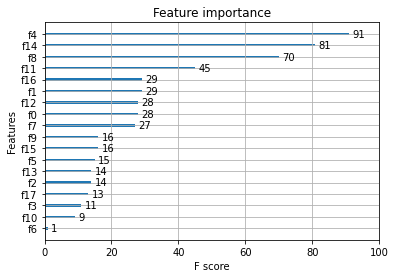

In [99]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [100]:
# fitting the model with the selected 5 factors
model = XGBClassifier()
model.fit(X5, Y)

XGBClassifier()

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

In [102]:
model = XGBClassifier()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
predictions_proba = model.predict_proba(X_test)

In [103]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, predictions)

In [104]:
print(accuracy)

0.9807692307692307


In [105]:
f1 = f1_score(Y_test, predictions)
print(f1)

0.9572649572649573


In [106]:
print(predictions)

[0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0]


In [107]:
print(Y_test)

[0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0]


Features are connecting in the above Valuation.

Below, the Prediction Probability of not a unicorn with a less than one billion dollar valuation and a unicorn with one billion dollar valuation or more.

In [108]:
print(predictions_proba)

[[9.97662485e-01 2.33750115e-03]
 [9.95068252e-01 4.93174046e-03]
 [9.99149978e-01 8.50040640e-04]
 [4.78521585e-02 9.52147841e-01]
 [7.83973932e-03 9.92160261e-01]
 [9.99149978e-01 8.50040640e-04]
 [9.99149978e-01 8.50040640e-04]
 [9.98952091e-01 1.04792707e-03]
 [9.83410120e-01 1.65898874e-02]
 [9.99149978e-01 8.50040640e-04]
 [9.99149978e-01 8.50040640e-04]
 [7.54824877e-02 9.24517512e-01]
 [9.99149978e-01 8.50040640e-04]
 [9.96375442e-01 3.62455333e-03]
 [9.93386626e-01 6.61334675e-03]
 [4.64721322e-02 9.53527868e-01]
 [9.96114612e-01 3.88540654e-03]
 [9.89207327e-01 1.07926996e-02]
 [9.96375442e-01 3.62455333e-03]
 [9.82352614e-01 1.76474154e-02]
 [9.99149978e-01 8.50040640e-04]
 [9.99149978e-01 8.50040640e-04]
 [3.46029997e-02 9.65397000e-01]
 [8.36569130e-01 1.63430870e-01]
 [9.96375442e-01 3.62455333e-03]
 [9.96375442e-01 3.62455333e-03]
 [2.44659185e-03 9.97553408e-01]
 [9.97662485e-01 2.33750115e-03]
 [9.98877406e-01 1.12261181e-03]
 [9.99111831e-01 8.88183131e-04]
 [3.106117

Left column is valuation below 1 billion and right column are valuations above 1 billion.

In [109]:
predictions_proba = predictions_proba[:,1]
print(predictions_proba)

[2.33750115e-03 4.93174046e-03 8.50040640e-04 9.52147841e-01
 9.92160261e-01 8.50040640e-04 8.50040640e-04 1.04792707e-03
 1.65898874e-02 8.50040640e-04 8.50040640e-04 9.24517512e-01
 8.50040640e-04 3.62455333e-03 6.61334675e-03 9.53527868e-01
 3.88540654e-03 1.07926996e-02 3.62455333e-03 1.76474154e-02
 8.50040640e-04 8.50040640e-04 9.65397000e-01 1.63430870e-01
 3.62455333e-03 3.62455333e-03 9.97553408e-01 2.33750115e-03
 1.12261181e-03 8.88183131e-04 9.96893883e-01 9.60609503e-03
 8.50040640e-04 3.62455333e-03 2.33750115e-03 6.14898093e-03
 8.88183131e-04 4.32908861e-03 8.50040640e-04 1.07926996e-02
 1.07926996e-02 2.33750115e-03 1.12261181e-03 8.50040640e-04
 9.95773137e-01 9.96971011e-01 9.97260213e-01 4.93174046e-03
 9.90552902e-01 2.33750115e-03 8.50040640e-04 4.93174046e-03
 9.70203757e-01 9.98294771e-01 8.50040640e-04 4.42900695e-03
 8.50040640e-04 9.97340739e-01 2.33750115e-03 6.77011088e-02
 8.50040640e-04 1.31490175e-02 2.33750115e-03 2.81397849e-01
 8.50040640e-04 1.154240

In [110]:
np.quantile(predictions_proba,0.5)

0.004915900062769651

In [111]:
np.std(predictions_proba)

0.39501712

In [112]:
np.mean(predictions_proba)

0.2331309

In [113]:
np.amax(predictions_proba), np.amin(predictions_proba)

(0.9988708, 0.00085004064)

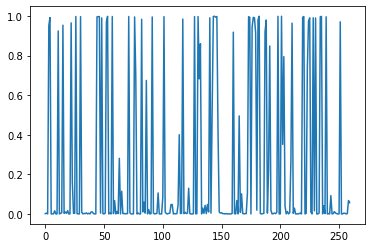

In [114]:
plt.plot(predictions_proba)

(array([175.,  11.,   6.,   1.,   1.,   1.,   1.,   1.,   1.,   0.,   2.,
          0.,   1.,   1.,   0.,   0.,   1.,   2.,   1.,   1.,   0.,   2.,
          2.,   5.,  44.]),
 array([8.5004064e-04, 4.0770870e-02, 8.0691703e-02, 1.2061253e-01,
        1.6053335e-01, 2.0045419e-01, 2.4037503e-01, 2.8029585e-01,
        3.2021669e-01, 3.6013752e-01, 4.0005833e-01, 4.3997917e-01,
        4.7990000e-01, 5.1982081e-01, 5.5974168e-01, 5.9966248e-01,
        6.3958335e-01, 6.7950416e-01, 7.1942496e-01, 7.5934583e-01,
        7.9926664e-01, 8.3918744e-01, 8.7910831e-01, 9.1902912e-01,
        9.5894998e-01, 9.9887079e-01], dtype=float32),
 <a list of 25 Patch objects>)

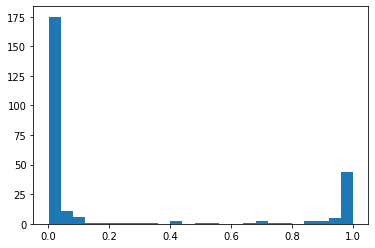

In [115]:
plt.hist(predictions_proba, bins=25)

*Model has high confidence as the near zero bar above is able to capture companies that are not one billion in valuation.*  

*Separately, if the company has a one billion valuation or more, then XGBoost Classifer trains effectively and has high confidence as the smaller bar to the right is close to one.*

*Moreover, the absence of bars above that are in between zero and one shows it generalizes well.  This is rare with financial data as it common to have bars in between zero and one, i.e., in the middle causing validation concerns of the model.*  

*Below is the Confusion Matrix to focus on True and False positives.*

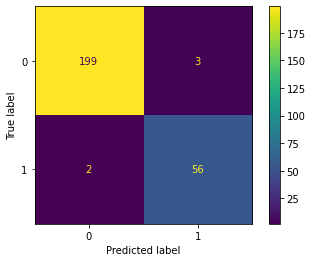

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [117]:
len(predictions)

260

*Only misses 3 times as a false positive Type I error out of 56 is very good.*

*There are 2 false negative Type II errors that failed to confrim it is true from the 199.*

*There are 5 companies of the 260 there were incorrectly assessed.*

# **End of Case Study by John Foxworthy**